## Load Libraries

In [1]:
import os
import tarfile
import sys
os.chdir('../..')
os.getcwd()
sys.path.append('c:/users/pesylvestre/appdata/roaming/python/python310/site-packages')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from mne import Epochs, find_events
import mne
import glob

from mne import find_events

plt.rcParams['figure.figsize'] = 14, 4 
#from notebooks.kapel.preproc import data_extract,set_info, bp_filter, epochs_gen

## Load Data

In [3]:
def eeg_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    #need a .vhdr
    
    with open(path, 'r') as file:
        filedata = file.read()
    filedata = filedata.replace(filedata[filedata.find("DataFile=")+len("DataFile="):
                                         filedata.find(".eeg")+1],
                                path.split("/")[-1].replace("vhdr", ""))
    with open(path, 'w') as file:
        file.write(filedata)
    raw = mne.io.read_raw_brainvision(path)
    raw.plot()
    raw.load_data()
    filt_raw = raw.copy().filter(0.1, 30, picks='eeg', method='iir', 
                             iir_params=dict(order=8, ftype='butter'), 
                             verbose=True)
    events = mne.events_from_annotations(filt_raw)
    epochs = mne.Epochs(filt_raw, events[0], event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs, events[0], events[1]

In [4]:
def tar_to_epoch(path, event_id=dict(T=1), tmin=-0.2, tmax=0.8, picks='eeg'):
    tar = tarfile.open(path)
    d = tar.getnames()
    print("->",os.getcwd())
    #print('/'.join(path.split("/")[0:-1]))
    tar.extractall(path='/'.join(path.split("/")[0:-1]))
    tar.close()
    print(d)
    eeg_to_epoch(path.replace(d[0]+".tar.gz", '')+"\n".join(s for s in d if "vhdr" in s), event_id, tmin, tmax, picks)

-> C:\Users\pesylvestre\Documents\Informatique\BRAIL\FY2023 In-House PoC3
['sub-032301', 'sub-032301/RSEEG', 'sub-032301/RSEEG/sub-032301.vmrk', 'sub-032301/RSEEG/sub-032301.vhdr', 'sub-032301/RSEEG/sub-032301.eeg']
Extracting parameters from C:/Users/pesylvestre/Documents/Informatique/BRAIL/FY2023 In-House PoC3/In-HousePOC3/in_housepoc3/data/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...
Using matplotlib as 2D backend.


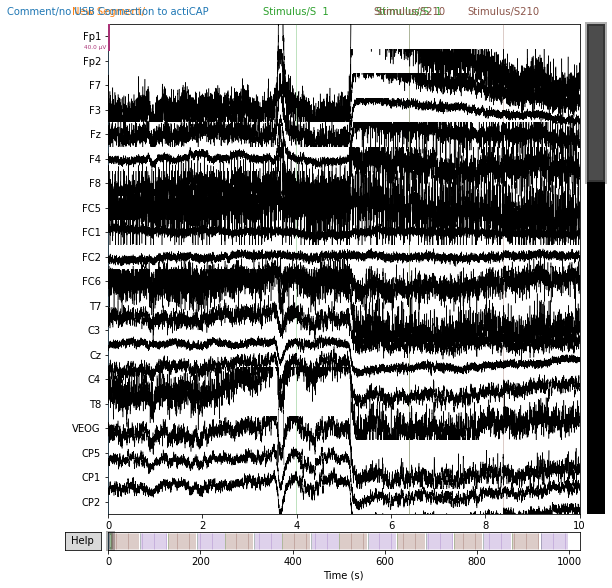

Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 32 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB

Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
Not setting metadata
17 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 17 events and 2501 original time points ...
0 bad epochs dropped


In [5]:
tar_to_epoch("C:/Users/pesylvestre/Documents/Informatique/BRAIL/FY2023 In-House PoC3/In-HousePOC3/in_housepoc3/data/sub-032301.tar.gz")

Extracting parameters from C:/Users/pesylvestre/Documents/Informatique/BRAIL/FY2023 In-House PoC3/brail_poc_1-master/EEG/sub-032301/RSEEG/sub-032301.vhdr...
Setting channel info structure...
<class 'mne.io.brainvision.brainvision.RawBrainVision'>


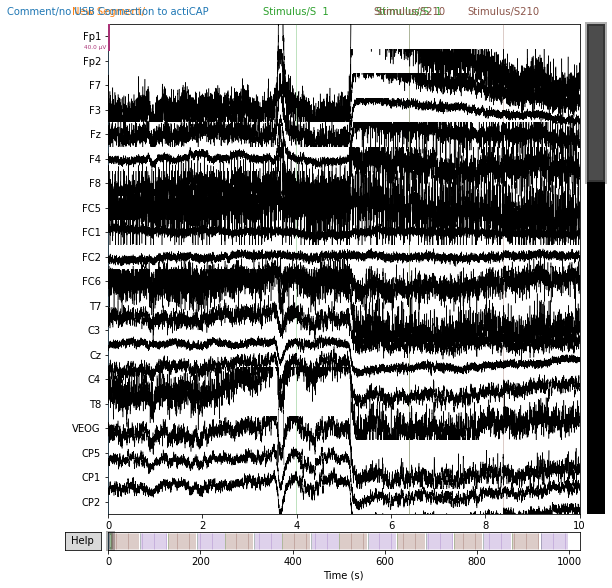

'trigger = data[["Trigger"]]\neeg_df = data.drop([\'CM\', \'M1\', \'S17\', \'S18\', \'S21\', \'Trigger\'], axis = 1)\n\nchannel_names = [\'P3\', \'C3\', \'F3\', \'Fz\', \'F4\', \'C4\', \'P4\', \n                 \'Cz\', \'FP1\', \'FP2\', \'T3\', \'T5\', \n                 \'O1\', \'O2\', \'F7\', \'F8\', \'M2\', \'T6\', \'T4\']'

In [6]:
#data = pd.read_csv("eeg_data/DSI_streamer/DSI-24_AEP_Sample_v_0.7.34_raw.csv", 
#                   skiprows=14, usecols = [*range(1,26)]) 
data = mne.io.read_raw_brainvision("C:/Users/pesylvestre/Documents/Informatique/BRAIL/FY2023 In-House PoC3/brail_poc_1-master/EEG/sub-032301/RSEEG/sub-032301.vhdr") 
print(type(data))
data.plot()
"""trigger = data[["Trigger"]]
eeg_df = data.drop(['CM', 'M1', 'S17', 'S18', 'S21', 'Trigger'], axis = 1)

channel_names = ['P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 
                 'Cz', 'FP1', 'FP2', 'T3', 'T5', 
                 'O1', 'O2', 'F7', 'F8', 'M2', 'T6', 'T4']"""


In [7]:
#eeg_df

In [8]:
#eeg_df.transpose()

In [9]:
#trigger

In [10]:
"""sfreq = 300
info = mne.create_info(ch_names = channel_names, sfreq = sfreq)
info"""

'sfreq = 300\ninfo = mne.create_info(ch_names = channel_names, sfreq = sfreq)\ninfo'

In [11]:
"""raw = mne.io.RawArray(eeg_df.transpose(), info)
raw.plot()"""

'raw = mne.io.RawArray(eeg_df.transpose(), info)\nraw.plot()'

## Plot Y values

In [12]:
plt.plot(trigger)
plt.figure()

NameError: name 'trigger' is not defined

## Plot raw data

In [ ]:
data.plot(color = 'blue', scalings= 'auto', duration =3, start = 0, 
         title = "Raw EEG signals", show_scalebars=True, show_scrollbars=False)

## Filter and Epochs generation

In [ ]:
X = eeg_df.to_numpy()
channels = eeg_df.columns.to_list()
y = trigger.to_numpy()

In [ ]:
info = mne.create_info(channels, sfreq, ch_types=['eeg']*19)
raw = mne.io.RawArray(X.T, info)

#montage = mne.channels.read_montage(kind= )
#About montage:
#https://mne.tools/0.11/generated/mne.channels.read_montage.html
#raw.set_montage("standard_alphabetic")
raw

In [ ]:
raw.set_montage("standard_alphabetic")

In [ ]:
info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
stim_raw = mne.io.RawArray(np.reshape(y, (-1, 1)).T, info)
raw.add_channels([stim_raw], force_update_info=True)

In [ ]:
filt_raw = raw.copy().filter(0.1, 30, picks='eeg', method='iir', 
                             iir_params=dict(order=8, ftype='butter'), 
                             verbose=True)

In [ ]:
filt_raw.plot(color = 'blue', scalings= 'auto', duration =5, start = 0, 
         title = "Raw EEG signals", show_scalebars=True, show_scrollbars=False);

In [ ]:
events = find_events(filt_raw)
events

In [ ]:
def epochs_gen(filt_raw, event_id=dict(T=1), 
               tmin=-0.2, tmax=0.8, picks='eeg'):
  
    events = find_events(filt_raw)
    epochs = Epochs(filt_raw, events, event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs


epochs = epochs_gen(filt_raw)

In [ ]:
epochs

In [ ]:
def set_ianfo(X, channels, sfreq=256):
    
    info = mne.create_info(channels, sfreq, ch_types=['eeg']*21)
    raw = mne.io.RawArray(X.T, info)
    raw.set_montage("standard_1020")
    
    return raw

def add_stim(raw, y):
    info = mne.create_info(['STI'], raw.info['sfreq'], ['stim'])
    stim_raw = mne.io.RawArray(np.reshape(y, (-1, 1)).T, info)
    raw.add_channels([stim_raw], force_update_info=True)
    
    return raw

def bp_filter(X, y, channels, f_low=0.1, f_high=30, picks='eeg', 
              iir_params= dict(order=8, ftype='butter')):
    
    raw = set_info(X, channels, sfreq=256)
    raw = add_stim(raw, y)
    filt_raw = raw.copy().filter(f_low, f_high, picks=picks, method='iir', 
                                 iir_params=iir_params, verbose=True)
    return filt_raw

def epochs_gen(filt_raw, event_id=dict(NT=0, T=1), 
               tmin=-0.2, tmax=0.8, picks='eeg'):
  
    events = find_events(filt_raw)
    epochs = Epochs(filt_raw, events, event_id, tmin, tmax, 
                    picks=picks, baseline=(-0.2, 0), reject=None, preload=True)
    return epochs


## Event matrix

In [ ]:
events = find_events(filt_raw)
mne.viz.plot_events(events)

## Plot filtered data with events

In [ ]:
epochs

In [ ]:

epochs.plot(picks='eeg', show_scrollbars=False, events = events,
                      event_id=dict(T = 1), n_epochs = 5,  scalings = 'auto')

# Butterfly plot

In [ ]:
mne.viz.plot_epochs(epochs, picks='eeg', show_scrollbars=False, events = events,
                    n_epochs = 3, scalings = 'auto', butterfly = True,
                   event_color = {1 : 'blue'});

In [ ]:
epochs['T'].plot_image(picks=channels[0], combine='mean');

## Epochs Image Plots
## Non Target image plot

## Target image plot

In [ ]:
channels

In [ ]:
ep_image_plots = []
for i in range(len(channels)):
    ep_image_plots.append(epochs['T'].plot_image(picks=channels[i], combine='mean'))

## Frequency Analysis

In [ ]:
epochs.plot_psd(fmin=0, fmax= 30, average=True, spatial_colors=True);

In [ ]:
raw

In [ ]:
epochs.plot_psd_topomap(normalize=True);

In [ ]:
epochs.plot_psd(fmax = 40, picks = 'eeg');

In [ ]:
epochs['T'].plot_psd(fmax = 40, picks = 'eeg');

## Generate Evoked data

In [ ]:
epochs

In [ ]:
evoked_averaged = epochs.average(by_event_type = True)
evoked_averaged

## Target Evoked plotm

In [ ]:
evoked_averaged[0].plot(picks='eeg', spatial_colors=True, gfp=True);

## Topomaps of Evokeds

## Non Target topomaps

## Target topomaps

In [ ]:
times = np.linspace(0.05, 0.25, 5)
evoked_averaged[0].plot_topomap(ch_type='eeg', times=times, colorbar=True);

## Target Joint plot

In [ ]:
evoked_averaged[0].plot_joint();

## Image plots
## Non Target image plot

## Target image plot

In [ ]:
evoked_averaged[0].plot_image(picks='eeg');

## ICA

In [ ]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [ ]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1,2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

## ICA

In [ ]:
from mne.preprocessing import ICA
ica = ICA(n_components=8, max_iter='auto', random_state=13)
ica.fit(filt_raw)
ica

In [ ]:
ica.plot_components()

In [ ]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

In [ ]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')


In [ ]:
ica.plot_properties(raw, picks=[0, 1, 2, 3, 4, 5, 6, 7])
